In [9]:
pip install pytorch-pretrained-biggan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 13.1 MB/s eta 0:00:00


100%|██████████| 715/715 [00:00<00:00, 2978080.79B/s]


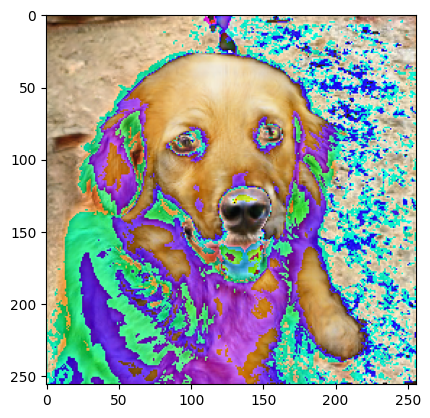

In [10]:
import torch
from pytorch_pretrained_biggan import BigGAN, truncated_noise_sample, one_hot_from_int
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# Function to generate an image using BigGAN
def generate_biggan_image(model, class_vector, truncation=0.4):
    noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)
    noise_vector = torch.from_numpy(noise_vector)
    class_vector = torch.from_numpy(class_vector)
    with torch.no_grad():
        output = model(noise_vector, class_vector, truncation)
    return output

# Function to transform the generated image
def transform_image(image_tensor):
    transform = transforms.ToPILImage()
    image = transform(image_tensor.squeeze())
    return image

# Example: Generate and transform an image
class_vector = one_hot_from_int(207, batch_size=1)  # Example class vector for 'Golden Retriever'
generated_image_tensor = generate_biggan_image(model, class_vector)
generated_image = transform_image(generated_image_tensor[0].cpu())

# Display the generated image
plt.imshow(generated_image)
plt.show()


In [13]:
import cv2
import numpy as np

# Paths to the directories and files
image_paths = ['/content/drive/MyDrive/data /black hoodies', '/content/drive/MyDrive/data /pink hoodies']
mask_paths = {
    'Hood': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_hood_mask.jpg',
    'Logo': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_logo_mask.jpg',
    'Sleeves': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_sleeve_mask.jpg',
    'Cuffs': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_cuffs_mask.jpg',
    'Waistband': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_waistband_mask.jpg',
    'Front Bodies': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_front bodies_mask.jpg'
}

# Function to apply the generated pattern to the hoodie part
def apply_pattern(image, mask, pattern):
    mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    pattern_resized = cv2.resize(np.array(pattern), (mask.shape[1], mask.shape[0]))
    image[mask == 255] = pattern_resized[mask == 255]
    return image

# Load the original hoodie images
original_images = [cv2.imread(path) for path in image_paths]

# Apply the generated pattern to each part of the hoodie
redesigned_image = original_images[0].copy()  # Start with the base image

# Apply the generated patterns to the segmented parts using masks
generated_pattern = np.array(generated_image)
for part, mask_path in mask_paths.items():
    redesigned_image = apply_pattern(redesigned_image, mask_path, generated_pattern)

# Save and display the redesigned image
cv2.imwrite('redesigned_hoodie.png', redesigned_image)
cv2.imshow('Redesigned Hoodie', redesigned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'copy'

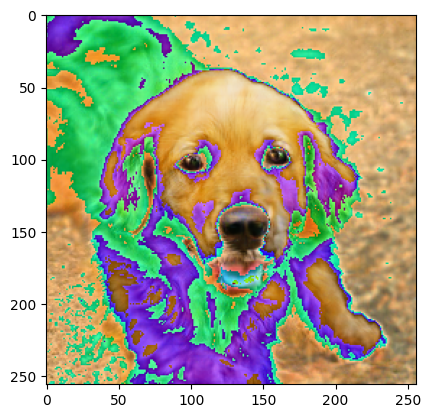

/content/drive/MyDrive/data /black hoodies/058dd611bcfd8f7c31c19597dd48b5c9.jpg
/content/drive/MyDrive/data /pink hoodies/082b6de6a4e60cf4cd8a8b5bbb934a58.jpg
2


In [20]:
import torch
from pytorch_pretrained_biggan import BigGAN, truncated_noise_sample, one_hot_from_int
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load pre-trained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# Function to generate an image using BigGAN
def generate_biggan_image(model, class_vector, truncation=0.4):
    noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)
    noise_vector = torch.from_numpy(noise_vector)
    class_vector = torch.from_numpy(class_vector)
    with torch.no_grad():
        output = model(noise_vector, class_vector, truncation)
    return output

# Function to transform the generated image
def transform_image(image_tensor):
    transform = transforms.ToPILImage()
    image = transform(image_tensor.squeeze())
    return image

# Example: Generate and transform an image
class_vector = one_hot_from_int(207, batch_size=1)  # Example class vector for 'Golden Retriever'
generated_image_tensor = generate_biggan_image(model, class_vector)
generated_image = transform_image(generated_image_tensor[0].cpu())

# Display the generated image
plt.imshow(generated_image)
plt.show()

# Paths to the directories and files
image_paths = ['/content/drive/MyDrive/data /black hoodies/058dd611bcfd8f7c31c19597dd48b5c9.jpg', '/content/drive/MyDrive/data /pink hoodies/082b6de6a4e60cf4cd8a8b5bbb934a58.jpg']
mask_paths = {
    'Hood': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_hood_mask.jpg',
    'Logo': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_logo_mask.jpg',
    'Sleeves': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_sleeve_mask.jpg',
    'Cuffs': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_cuffs_mask.jpg',
    'Waistband': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_waistband_mask.jpg',
    'Front Bodies': '/content/drive/MyDrive/Image_Masked/black hoodies/058dd611bcfd8f7c31c19597dd48b5c9mask_front bodies_mask.jpg'
}

# Function to apply the generated pattern to the hoodie part
def apply_pattern(image, mask_path, pattern):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Mask not found: {mask_path}")
        return image
    pattern_resized = cv2.resize(np.array(pattern), (mask.shape[1], mask.shape[0]))
    image[mask == 255] = pattern_resized[mask == 255]
    return image

# Load the original hoodie images
original_images = []
for path in image_paths:
  print(path)
  image = cv2.imread(path)
  if image is None:
      print(f"Image not found or cannot be loaded: {path}")
  original_images.append(image)
print(len(original_images))
# Ensure images are loaded properly
# if None in original_images:
    # raise ValueError("One or more images could not be loaded. Please check the file paths.")

# Apply the generated pattern to each part of the hoodie
redesigned_image = original_images[0].copy()  # Start with the base image

# Apply the generated patterns to the segmented parts using masks
generated_pattern = np.array(generated_image)
for part, mask_path in mask_paths.items():
    redesigned_image = apply_pattern(redesigned_image, mask_path, generated_pattern)

# Save and display the redesigned image
output_path = '/content/drive/MyDrive/redesigned_hoodie.png'
cv2.imwrite(output_path, redesigned_image)
# cv2.imshow('Redesigned Hoodie', redesigned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
pip install svgwrite


In [6]:
import random
import svgwrite

def generate_random_hoodie():
    hoodie_types = ["Black and Pink Hoodie", "Blue and Green Hoodie", "Brown and White Hoodie", "Pink and Green Hoodie"]
    selected_hoodie = random.choice(hoodie_types)

    dwg = svgwrite.Drawing('hoodie_template.svg', profile='tiny', size=("800px", "1000px"))

    def draw_hoodie():
        if selected_hoodie == "Black and Pink Hoodie":
            draw_black_pink_hoodie(dwg)
        elif selected_hoodie == "Blue and Green Hoodie":
            draw_blue_green_hoodie(dwg)
        elif selected_hoodie == "Brown and White Hoodie":
            draw_brown_white_hoodie(dwg)
        elif selected_hoodie == "Pink and Green Hoodie":
            draw_pink_green_hoodie(dwg)

    draw_hoodie()
    dwg.save()

def draw_black_pink_hoodie(dwg):
    # Hood
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "100px"), fill="black"))
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "50px"), fill="url(#gradient_black_pink)"))

    # Logo
    dwg.add(dwg.text('Logo', insert=(350, 140), fill='pink', font_size="30px", font_family="Arial"))

    # Sleeves
    dwg.add(dwg.rect(insert=(100, 200), size=("100px", "300px"), fill="black"))
    dwg.add(dwg.rect(insert=(100, 450), size=("100px", "50px"), fill="pink"))
    dwg.add(dwg.rect(insert=(600, 200), size=("100px", "300px"), fill="black"))
    dwg.add(dwg.rect(insert=(600, 450), size=("100px", "50px"), fill="pink"))

    # Cuffs
    dwg.add(dwg.rect(insert=(100, 500), size=("100px", "50px"), fill="pink"))
    dwg.add(dwg.rect(insert=(600, 500), size=("100px", "50px"), fill="pink"))

    # Waistband
    dwg.add(dwg.rect(insert=(200, 650), size=("400px", "50px"), fill="url(#polka_black_pink)"))

    # Front Bodies
    dwg.add(dwg.rect(insert=(200, 200), size=("200px", "450px"), fill="black"))
    dwg.add(dwg.rect(insert=(400, 200), size=("200px", "450px"), fill="pink"))

    # Adding gradients and patterns
    gradient_black_pink = dwg.linearGradient((0, 0), (1, 0))
    gradient_black_pink.add_stop_color(0, 'black')
    gradient_black_pink.add_stop_color(1, 'pink')
    dwg.defs.add(gradient_black_pink)

    polka_black_pink = dwg.pattern(size=(20, 20), patternUnits="userSpaceOnUse", id="polka_black_pink")
    polka_black_pink.add(dwg.rect(insert=(0, 0), size=(20, 20), fill="black"))
    polka_black_pink.add(dwg.circle(center=(10, 10), r=5, fill="pink"))
    dwg.defs.add(polka_black_pink)

def draw_blue_green_hoodie(dwg):
    # Hood
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "100px"), fill="green"))
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "50px"), fill="url(#geometric_blue_green)"))

    # Logo
    dwg.add(dwg.text('Logo', insert=(350, 140), fill='white', font_size="30px", font_family="Arial"))

    # Sleeves
    dwg.add(dwg.rect(insert=(100, 200), size=("100px", "300px"), fill="blue"))
    dwg.add(dwg.rect(insert=(100, 300), size=("100px", "50px"), fill="green"))
    dwg.add(dwg.rect(insert=(600, 200), size=("100px", "300px"), fill="blue"))
    dwg.add(dwg.rect(insert=(600, 300), size=("100px", "50px"), fill="green"))

    # Cuffs
    dwg.add(dwg.rect(insert=(100, 500), size=("100px", "50px"), fill="green"))
    dwg.add(dwg.rect(insert=(600, 500), size=("100px", "50px"), fill="green"))

    # Waistband
    dwg.add(dwg.rect(insert=(200, 650), size=("200px", "50px"), fill="blue"))
    dwg.add(dwg.rect(insert=(400, 650), size=("200px", "50px"), fill="green"))

    # Front Bodies
    dwg.add(dwg.rect(insert=(200, 200), size=("400px", "225px"), fill="blue"))
    dwg.add(dwg.rect(insert=(200, 425), size=("400px", "225px"), fill="green"))

    # Adding geometric patterns
    geometric_blue_green = dwg.pattern(size=(40, 40), patternUnits="userSpaceOnUse", id="geometric_blue_green")
    geometric_blue_green.add(dwg.rect(insert=(0, 0), size=(20, 20), fill="blue"))
    geometric_blue_green.add(dwg.rect(insert=(20, 20), size=(20, 20), fill="green"))
    dwg.defs.add(geometric_blue_green)

def draw_brown_white_hoodie(dwg):
    # Hood
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "100px"), fill="brown"))
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "50px"), fill="url(#floral_brown_white)"))

    # Logo
    dwg.add(dwg.text('Logo', insert=(350, 140), fill='brown', font_size="30px", font_family="Arial"))

    # Sleeves
    dwg.add(dwg.rect(insert=(100, 200), size=("100px", "300px"), fill="white"))
    dwg.add(dwg.rect(insert=(100, 500), size=("100px", "50px"), fill="brown"))
    dwg.add(dwg.rect(insert=(600, 200), size=("100px", "300px"), fill="white"))
    dwg.add(dwg.rect(insert=(600, 500), size=("100px", "50px"), fill="brown"))

    # Cuffs
    dwg.add(dwg.rect(insert=(100, 500), size=("100px", "50px"), fill="brown"))
    dwg.add(dwg.rect(insert=(600, 500), size=("100px", "50px"), fill="brown"))

    # Waistband
    dwg.add(dwg.rect(insert=(200, 650), size=("400px", "50px"), fill="url(#geometric_white_brown)"))

    # Front Bodies
    dwg.add(dwg.rect(insert=(200, 200), size=("400px", "450px"), fill="white"))
    dwg.add(dwg.rect(insert=(300, 300), size=("200px", "250px"), fill="url(#pattern_brown)"))

    # Adding floral and geometric patterns
    floral_brown_white = dwg.pattern(size=(40, 40), patternUnits="userSpaceOnUse", id="floral_brown_white")
    floral_brown_white.add(dwg.circle(center=(20, 20), r=20, fill="white"))
    floral_brown_white.add(dwg.circle(center=(20, 20), r=15, fill="brown"))
    dwg.defs.add(floral_brown_white)

    geometric_white_brown = dwg.pattern(size=(40, 40), patternUnits="userSpaceOnUse", id="geometric_white_brown")
    geometric_white_brown.add(dwg.rect(insert=(0, 0), size=(20, 20), fill="brown"))
    geometric_white_brown.add(dwg.rect(insert=(20, 20), size=(20, 20), fill="white"))
    dwg.defs.add(geometric_white_brown)

    pattern_brown = dwg.pattern(size=(40, 40), patternUnits="userSpaceOnUse", id="pattern_brown")
    pattern_brown.add(dwg.circle(center=(20, 20), r=20, fill="brown"))
    dwg.defs.add(pattern_brown)

def draw_pink_green_hoodie(dwg):
    # Hood
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "100px"), fill="pink"))
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "50px"), fill="green"))

    # Logo
    dwg.add(dwg.text('Logo', insert=(350, 140), fill='green', font_size="30px", font_family="Arial"))

    # Sleeves
    dwg.add(dwg.rect(insert=(100, 200), size=("100px", "300px"), fill="green"))
    dwg.add(dwg.rect(insert=(100, 450), size=("100px", "50px"), fill="pink"))
    dwg.add(dwg.rect(insert=(600, 200), size=("100px", "300px"), fill="green"))
    dwg.add(dwg.rect(insert=(600, 450), size=("100px", "50px"), fill="pink"))

    # Cuffs
    dwg.add(dwg.rect(insert=(100, 500), size=("100px", "50px"), fill="pink"))
    dwg.add(dwg.rect(insert=(600, 500), size=("100px", "50px"), fill="pink"))

    # Waistband
    dwg.add(dwg.rect(insert=(200, 650), size=("400px", "50px"), fill="url(#stripes_green_pink)"))

    # Front Bodies
    dwg.add(dwg.rect(insert=(200, 200), size=("400px", "225px"), fill="pink"))
    dwg.add(dwg.rect(insert=(200, 425), size=("400px", "225px"), fill="green"))

    # Adding stripes pattern
    stripes_green_pink = dwg.pattern(size=(20, 20), patternUnits="userSpaceOnUse", id="stripes_green_pink")
    stripes_green_pink.add(dwg.rect(insert=(0, 0), size=(20, 10), fill="green"))
    stripes_green_pink.add(dwg.rect(insert=(0, 10), size=(20, 10), fill="pink"))
    dwg.defs.add(stripes_green_pink)

generate_random_hoodie()


KeyError: "<pattern> is not valid for selected profile: 'Tiny 1.2'."

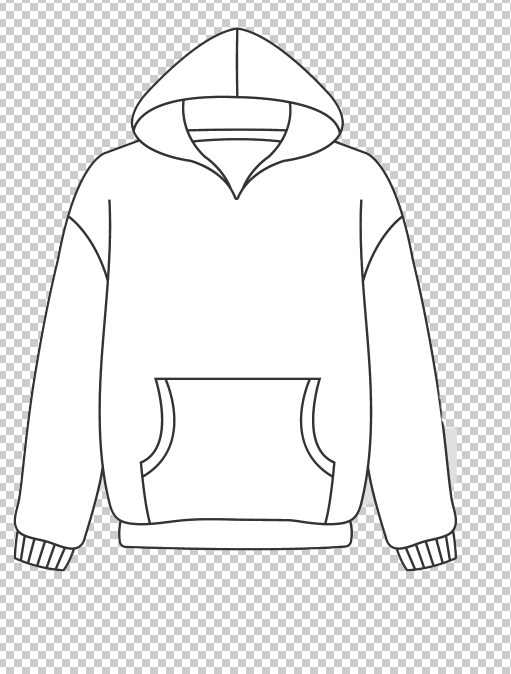

In [5]:
import random
import svgwrite

def generate_random_hoodie():
    hoodie_types = ["Black and Pink Hoodie", "Blue and Green Hoodie", "Brown and White Hoodie", "Pink and Green Hoodie"]
    selected_hoodie = random.choice(hoodie_types)

    dwg = svgwrite.Drawing('hoodie_template.svg', profile='full', size=("800px", "1000px"))

    def draw_hoodie():
        if selected_hoodie == "Black and Pink Hoodie":
            draw_black_pink_hoodie(dwg)
        elif selected_hoodie == "Blue and Green Hoodie":
            draw_blue_green_hoodie(dwg)
        elif selected_hoodie == "Brown and White Hoodie":
            draw_brown_white_hoodie(dwg)
        elif selected_hoodie == "Pink and Green Hoodie":
            draw_pink_green_hoodie(dwg)

    draw_hoodie()
    dwg.save()

def draw_black_pink_hoodie(dwg):
    # Hood
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "100px"), fill="black"))
    dwg.add(dwg.rect(insert=(200, 50), size=("400px", "50px"), fill="url(#gradient_black_pink)"))

    # Logo
    dwg.add(dwg.text('Logo', insert=(350, 140), fill='pink', font_size="30px", font_family="Arial"))

    # Sleeves
    dwg.add(dwg.rect(insert=(100, 200), size=("100px", "300px"), fill="black"))
    dwg.add(dwg.rect(insert=(100, 450), size=("100px", "50px"), fill="pink"))
    dwg.add(dwg.rect(insert=(600, 200), size=("100px", "300px"), fill="black"))
    dwg.add(dwg.rect(insert=(600, 450), size=("100px", "50px"), fill="pink"))

    # Cuffs
    dwg.add(dwg.rect(insert=(100, 500), size=("100px", "50px"), fill="pink"))
    dwg.add(dwg.rect(insert=(600, 500), size=("100px", "50px"), fill="pink"))

    # Waistband
    dwg.add(dwg.rect(insert=(200, 650), size=("400px", "50px"), fill="url(#polka_black_pink)"))

    # Front Bodies
    dwg.add(dwg.rect(insert=(200, 200), size=("200px", "450px"), fill="black"))
    dwg.add(dwg.rect(insert=(400, 200), size=("200px", "450px"), fill="pink"))

    # Adding gradients and patterns
    gradient_black_pink = dwg.linearGradient((0, 0), (1, 0), id="gradient_black_pink")
    gradient_black_pink.add_stop_color(0, 'black')
    gradient_black_pink.add_stop_color(1, 'pink')
    dwg.defs.add(gradient_black_pink)

   polka_black_pink = dwg.pattern(size=(20, 20), patternUnits="userSpaceOnUse")



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 54)

In [2]:
!pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.9 MB/s eta 0:00:00


In [1]:
import svgwrite
import random

def draw_random_hoodie():
    # Create an SVG drawing object
    dwg = svgwrite.Drawing('/mnt/data/random_hoodie_template.svg', profile='tiny', size=("200px", "300px"))

    # Define color schemes
    hoodies = [
        {
            "hood": {"colors": ["#000000", "#ff69b4"], "type": "gradient"},
            "logo": "#ff69b4",
            "sleeves": {"main": "#000000", "lower": "#ff69b4"},
            "cuffs": "#ff69b4",
            "waistband": {"colors": ["#000000", "#ff69b4"], "pattern": "polka_dots"},
            "body": {"left": "#000000", "right": "#ff69b4"}
        },
        {
            "hood": {"colors": ["#008000", "#0000ff"], "type": "geometric"},
            "logo": "#ffffff",
            "sleeves": {"main": "#0000ff", "stripes": "#008000"},
            "cuffs": "#008000",
            "waistband": {"colors": ["#0000ff", "#008000"], "pattern": "two_tone"},
            "body": {"top": "#0000ff", "bottom": "#008000"}
        },
        {
            "hood": {"colors": ["#a52a2a", "#ffffff"], "type": "floral"},
            "logo": "#a52a2a",
            "sleeves": {"main": "#ffffff", "cuffs": "#a52a2a"},
            "cuffs": "#a52a2a",
            "waistband": {"colors": ["#ffffff", "#a52a2a"], "pattern": "geometric"},
            "body": {"pattern": "#a52a2a", "background": "#ffffff"}
        },
        {
            "hood": {"colors": ["#ff69b4", "#008000"], "type": "highlights"},
            "logo": "#008000",
            "sleeves": {"main": "#008000", "lower": "#ff69b4"},
            "cuffs": "#ff69b4",
            "waistband": {"colors": ["#008000", "#ff69b4"], "pattern": "stripes"},
            "body": {"top": "#ff69b4", "bottom": "#008000"}
        }
    ]

    # Select a random hoodie design
    hoodie = random.choice(hoodies)

    # Define the color for the outlines
    stroke_color = "#000000"  # Black color for the outline

    # Draw the hood
    if hoodie["hood"]["type"] == "gradient":
        gradient = dwg.linearGradient(start=("0%", "0%"), end=("0%", "100%"))
        gradient.add_stop_color(0, hoodie["hood"]["colors"][0])
        gradient.add_stop_color(1, hoodie["hood"]["colors"][1])
        dwg.defs.add(gradient)
        hood_fill = gradient.get_paint_server()
    else:
        hood_fill = hoodie["hood"]["colors"][0]

    dwg.add(dwg.line(start=(100, 30), end=(60, 90), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(100, 30), end=(140, 90), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(60, 90), end=(140, 90), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(80, 70), end=(120, 70), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.path(d="M60,90 C80,40 120,40 140,90", fill=hood_fill, stroke=stroke_color, stroke_width=2))

    # Draw the body of the hoodie
    if "left" in hoodie["body"] and "right" in hoodie["body"]:
        dwg.add(dwg.rect(insert=(50, 90), size=(50, 120), rx=15, ry=15, fill=hoodie["body"]["left"], stroke=stroke_color, stroke_width=2))
        dwg.add(dwg.rect(insert=(100, 90), size=(50, 120), rx=15, ry=15, fill=hoodie["body"]["right"], stroke=stroke_color, stroke_width=2))
    elif "top" in hoodie["body"] and "bottom" in hoodie["body"]:
        dwg.add(dwg.rect(insert=(50, 90), size=(100, 60), rx=15, ry=15, fill=hoodie["body"]["top"], stroke=stroke_color, stroke_width=2))
        dwg.add(dwg.rect(insert=(50, 150), size=(100, 60), rx=15, ry=15, fill=hoodie["body"]["bottom"], stroke=stroke_color, stroke_width=2))
    else:
        dwg.add(dwg.rect(insert=(50, 90), size=(100, 120), rx=15, ry=15, fill=hoodie["body"]["background"], stroke=stroke_color, stroke_width=2))
        dwg.add(dwg.text("Pattern", insert=(75, 150), fill=hoodie["body"]["pattern"]))

    # Draw the sleeves
    dwg.add(dwg.rect(insert=(30, 90), size=(20, 80), fill=hoodie["sleeves"]["main"], stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.rect(insert=(30, 170), size=(20, 40), fill=hoodie["sleeves"].get("lower", hoodie["cuffs"]), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 90), size=(20, 80), fill=hoodie["sleeves"]["main"], stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 170), size=(20, 40), fill=hoodie["sleeves"].get("lower", hoodie["cuffs"]), stroke=stroke_color, stroke_width=2))

    # Draw the pocket
    dwg.add(dwg.rect(insert=(75, 160), size=(50, 30), rx=10, ry=10, fill=hoodie["body"].get("pattern", "none"), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(75, 175), end=(125, 175), stroke=stroke_color, stroke_width=2))

    # Draw the waistband
    dwg.add(dwg.line(start=(65, 210), end=(135, 210), stroke=stroke_color, stroke_width=2))

    # Draw the cuffs
    dwg.add(dwg.line(start=(30, 200), end=(30, 220), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(170, 200), end=(170, 220), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(30, 220), end=(60, 220), stroke=stroke_color, stroke_width=2))
    dwg.add(dwg.line(start=(170, 220), end=(140, 220), stroke=stroke_color, stroke_width=2))

    # Save the SVG file
    dwg.save()

# Call the function to draw a random hoodie
draw_random_hoodie()

'/mnt/data/random_hoodie_template.svg'


ModuleNotFoundError: No module named 'svgwrite'

In [8]:
import svgwrite
import os

# Define colors JSON
colors = [
    {
        "name": "Green and White Hoodie",
        "hood": "green",
        "logo": "white",
        "sleeves": "green",
        "cuffs": "white",
        "waistband": "green",
        "pocket": "white",
        "front_bodies": "green"
    },
    {
        "name": "Black and Pink Hoodie",
        "hood": "black",
        "logo": "pink",
        "sleeves": "black",
        "cuffs": "pink",
        "waistband": "black",
        "pocket": "pink",
        "front_bodies": "black"
    },
    {
        "name": "Blue and Brown Hoodie",
        "hood": "blue",
        "logo": "brown",
        "sleeves": "blue",
        "cuffs": "brown",
        "waistband": "blue",
        "pocket": "brown",
        "front_bodies": "blue"
    },
    {
        "name": "Pink and White Hoodie",
        "hood": "pink",
        "logo": "white",
        "sleeves": "pink",
        "cuffs": "white",
        "waistband": "pink",
        "pocket": "white",
        "front_bodies": "pink"
    },
    {
        "name": "Green and Brown Hoodie",
        "hood": "green",
        "logo": "brown",
        "sleeves": "green",
        "cuffs": "brown",
        "waistband": "green",
        "pocket": "brown",
        "front_bodies": "green"
    },
    {
        "name": "Blue and White Hoodie",
        "hood": "blue",
        "logo": "white",
        "sleeves": "blue",
        "cuffs": "white",
        "waistband": "blue",
        "pocket": "white",
        "front_bodies": "blue"
    }
]

def generate_hoodie_with_colors(color_scheme, index, output_path):
    # Create a drawing object
    dwg = svgwrite.Drawing(f'{output_path}/hoodie_{index}.svg', profile='tiny', size=(200, 200))

    # Hoodie Hood
    dwg.add(dwg.path(d="M70,40 Q100,10 130,40 L130,80 Q100,50 70,80 Z",
                     fill=color_scheme['hood'], stroke="black", stroke_width=2))

    # Front Bodies
    dwg.add(dwg.rect(insert=(50, 80), size=(100, 80),
                     fill=color_scheme['front_bodies'], stroke="black", stroke_width=2))

    # Hoodie Pocket
    dwg.add(dwg.rect(insert=(80, 120), size=(40, 20),
                     fill=color_scheme['pocket'], stroke="black", stroke_width=2))
    dwg.add(dwg.line(start=(80, 130), end=(120, 130), stroke="black", stroke_width=2))

    # Hoodie Sleeves
    dwg.add(dwg.rect(insert=(30, 80), size=(20, 60),
                     fill=color_scheme['sleeves'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(30, 120), size=(20, 20),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 80), size=(20, 60),
                     fill=color_scheme['sleeves'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 120), size=(20, 20),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))

    # Hoodie Cuffs
    dwg.add(dwg.rect(insert=(30, 140), size=(20, 10),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 140), size=(20, 10),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))

    # Hoodie Waistband
    dwg.add(dwg.rect(insert=(50, 160), size=(100, 10),
                     fill=color_scheme['waistband'], stroke="black", stroke_width=2))

    # Hoodie Logo
    dwg.add(dwg.circle(center=(100, 100), r=10,
                       fill=color_scheme['logo'], stroke="black", stroke_width=2))

    # Save the drawing
    dwg.save()

# Create a directory to save the images if it doesn't exist
base_output_dir = '/content/drive/MyDrive/hoodie_images'
os.makedirs(base_output_dir, exist_ok=True)

# Generate 1000 images for each color scheme
for color_scheme in colors:
    scheme_name = color_scheme['name'].replace(" ", "_").lower()
    scheme_output_dir = os.path.join(base_output_dir, scheme_name)
    print(scheme_output_dir)
    os.makedirs(scheme_output_dir, exist_ok=True)

    for i in range(1000):
        generate_hoodie_with_colors(color_scheme, i, scheme_output_dir)

/content/drive/MyDrive/hoodie_images/green_and_white_hoodie
/content/drive/MyDrive/hoodie_images/black_and_pink_hoodie
/content/drive/MyDrive/hoodie_images/blue_and_brown_hoodie
/content/drive/MyDrive/hoodie_images/pink_and_white_hoodie
/content/drive/MyDrive/hoodie_images/green_and_brown_hoodie
/content/drive/MyDrive/hoodie_images/blue_and_white_hoodie


In [4]:
import svgwrite
import os
import random

# Define colors JSON
colors = [
    {
        "name": "Green and White Hoodie",
        "hood": "green",
        "logo": "white",
        "sleeves": "green",
        "cuffs": "white",
        "waistband": "green",
        "pocket": "white",
        "front_bodies": "green"
    },
    {
        "name": "Black and Pink Hoodie",
        "hood": "black",
        "logo": "pink",
        "sleeves": "black",
        "cuffs": "pink",
        "waistband": "black",
        "pocket": "pink",
        "front_bodies": "black"
    },
    {
        "name": "Blue and Brown Hoodie",
        "hood": "blue",
        "logo": "brown",
        "sleeves": "blue",
        "cuffs": "brown",
        "waistband": "blue",
        "pocket": "brown",
        "front_bodies": "blue"
    },
    {
        "name": "Pink and White Hoodie",
        "hood": "pink",
        "logo": "white",
        "sleeves": "pink",
        "cuffs": "white",
        "waistband": "pink",
        "pocket": "white",
        "front_bodies": "pink"
    },
    {
        "name": "Green and Brown Hoodie",
        "hood": "green",
        "logo": "brown",
        "sleeves": "green",
        "cuffs": "brown",
        "waistband": "green",
        "pocket": "brown",
        "front_bodies": "green"
    },
    {
        "name": "Blue and White Hoodie",
        "hood": "blue",
        "logo": "white",
        "sleeves": "blue",
        "cuffs": "white",
        "waistband": "blue",
        "pocket": "white",
        "front_bodies": "blue"
    }
]

def generate_random_hoodie_with_colors(color_scheme, index, output_path):
    # Create a drawing object
    dwg = svgwrite.Drawing(f'{output_path}/hoodie_{index}.svg', profile='tiny', size=(200, 200))

    # Introduce some variability
    hood_height = 40 + random.randint(-5, 5)
    pocket_height = 20 + random.randint(-5, 5)
    sleeve_length = 60 + random.randint(-10, 10)
    logo_size = 10 + random.randint(-2, 2)

    # Hoodie Hood
    dwg.add(dwg.path(d=f"M70,{hood_height} Q100,10 130,{hood_height} L130,80 Q100,50 70,80 Z",
                     fill=color_scheme['hood'], stroke="black", stroke_width=2))

    # Front Bodies
    dwg.add(dwg.rect(insert=(50, 80), size=(100, 80),
                     fill=color_scheme['front_bodies'], stroke="black", stroke_width=2))

    # Hoodie Pocket
    dwg.add(dwg.rect(insert=(80, 120), size=(40, pocket_height),
                     fill=color_scheme['pocket'], stroke="black", stroke_width=2))
    dwg.add(dwg.line(start=(80, 130), end=(120, 130), stroke="black", stroke_width=2))

    # Hoodie Sleeves
    dwg.add(dwg.rect(insert=(30, 80), size=(20, sleeve_length),
                     fill=color_scheme['sleeves'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(30, 80 + sleeve_length), size=(20, 20),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 80), size=(20, sleeve_length),
                     fill=color_scheme['sleeves'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 80 + sleeve_length), size=(20, 20),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))

    # Hoodie Cuffs
    dwg.add(dwg.rect(insert=(30, 140), size=(20, 10),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))
    dwg.add(dwg.rect(insert=(150, 140), size=(20, 10),
                     fill=color_scheme['cuffs'], stroke="black", stroke_width=2))

    # Hoodie Waistband
    dwg.add(dwg.rect(insert=(50, 160), size=(100, 10),
                     fill=color_scheme['waistband'], stroke="black", stroke_width=2))

    # Hoodie Logo
    dwg.add(dwg.circle(center=(100, 100), r=logo_size,
                       fill=color_scheme['logo'], stroke="black", stroke_width=2))

    # Save the drawing
    dwg.save()

# Create a directory to save the images if it doesn't exist
base_output_dir = '/content/drive/My Drive/hoodie_images_updated'
os.makedirs(base_output_dir, exist_ok=True)

# Generate 1000 images for each color scheme
for color_scheme in colors:
    scheme_name = color_scheme['name'].replace(" ", "_").lower()
    scheme_output_dir = os.path.join(base_output_dir, scheme_name)
    os.makedirs(scheme_output_dir, exist_ok=True)

    for i in range(1000):
        generate_random_hoodie_with_colors(color_scheme, i, scheme_output_dir)

print("All images generated and saved to Google Drive.")


All images generated and saved to Google Drive.


In [2]:
!pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.8 MB/s eta 0:00:00
